### Лабораторная работа №2. Классификация

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

## Задание 1

Какова вероятность отправиться на прогулку если идёт дождь, при наличии следующих наблюдений?

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [9]:
data = pd.DataFrame(data, columns=["weather", "walk"]) 
 
p_walk = (data["walk"].sum())/data["walk"].count() 
p_rain = data["weather"].value_counts()["дождь"]/data["walk"].count() 
 
walk_T = (data["walk"].sum()) 
rain_T = 0 
for i in range(0, data["walk"].count()): 
    if (data['walk'][i] == True) and (data['weather'][i] == "дождь"): 
        rain_T+=1 
p_rain_and_walk = rain_T/walk_T
 
print((p_walk*p_rain_and_walk)/p_rain)

0.3333333333333333


## Задание 2

### загрузите датасет для классификации, проведите предобработку, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;

In [3]:
data = pd.read_csv('../data/neo_task.csv')
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.1,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.7,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.4,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.7,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.4,False


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB


In [32]:
data.drop(['name'], axis= 1 , inplace= True )

In [33]:
data = data.fillna({ 'id':data['id'].mean(), 'est_diameter_max':data['est_diameter_max'].mean(), 'relative_velocity':data['relative_velocity'].mean(), 'absolute_magnitude':data['absolute_magnitude'].mean() })

In [34]:
print(pd.isnull(data).sum())

id                    0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64


In [35]:
data['hazardous'] = data['hazardous'].replace({ True : 1 , False : 0 })

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  float64
 1   est_diameter_min    90836 non-null  float64
 2   est_diameter_max    90836 non-null  float64
 3   relative_velocity   90836 non-null  float64
 4   miss_distance       90836 non-null  float64
 5   absolute_magnitude  90836 non-null  float64
 6   hazardous           90836 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 4.9 MB


In [37]:
data.to_csv('../data/neo_task_new2.csv')

In [3]:
data = pd.read_csv('../data/neo_task_new2.csv')
data.head()

,Unnamed: 0,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0,3561024.0,0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,1,54016766.0,0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,2,3746620.0,0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,3,3633054.0,0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,4,3742124.0,0.139494,0.311918,67639.394481,7.130590e+07,21.4,0


In [4]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,0
1,54016766.0,0.030518,0.068240,7864.348060,3.268186e+07,24.70,0
2,3746620.0,0.055533,0.124177,55257.544508,6.538636e+07,23.40,0
3,3633054.0,0.019256,0.043057,41531.404722,1.260796e+07,25.70,0
4,3742124.0,0.139494,0.311918,67639.394481,7.130590e+07,21.40,0
...,...,...,...,...,...,...,...
90831,54231436.0,0.017561,0.039268,23264.740825,1.635007e+06,25.90,0
90832,3824972.0,0.110804,0.247765,24802.519406,3.351901e+07,21.90,0
90833,3740101.0,0.035039,0.078350,116288.999548,5.471396e+07,24.40,0
90834,3691093.0,0.044112,0.098637,45763.317060,2.694877e+07,23.90,0


### В случае дисбаланса проведите балансировку

In [5]:
num_0 = len(data[data['hazardous']==0])
num_1 = len(data[data['hazardous']==1])
print(num_0,num_1)
# случайный андерсэмплинг
undersampled_data = pd.concat([ data[data['hazardous']==0].sample(num_1) , data[data['hazardous']==1] ])
print(len(undersampled_data))

81996 8840
17680


In [6]:
y = undersampled_data['hazardous']
X = undersampled_data.drop(['hazardous'], axis=1)

In [7]:
y.head()

30241    0
44303    0
28400    0
90671    0
15247    0
Name: hazardous, dtype: int64

In [8]:
X.head()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
30241,3843777.0,0.029144,0.065169,17952.855018,1.859378e+07,24.8
44303,3799759.0,0.019256,0.043057,68731.867138,5.603982e+07,25.7
28400,3716628.0,0.040230,0.089958,102445.201470,6.343682e+06,24.1
90671,3761747.0,0.035039,0.078350,42746.371182,5.690232e+07,24.4
15247,3797846.0,0.110804,0.247765,49761.368899,4.009669e+07,21.9


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14144, 6), (14144,), (3536, 6), (3536,))

### Масштабируйте числовые признаки

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[-0.39279598, -0.36587674, -0.36547905, -0.02870222,  0.38086481,
         0.00902707],
       [-0.47100279,  2.6530268 ,  2.6671769 , -0.79235433, -1.4035565 ,
        -1.71391967],
       [-0.46628777, -0.19720746, -0.19604141, -0.26666906,  0.54650958,
        -0.28582774],
       ...,
       [ 2.37821998, -0.71207041, -0.71324978,  0.55456808,  1.06587335,
         2.4104951 ],
       [-0.47616773,  2.62202771,  2.6360366 ,  2.56450641,  0.2961723 ,
        -1.70681474],
       [ 2.37334372, -0.54491784, -0.54533576, -0.63808635, -0.25632437,
         0.53479226]])

In [11]:
X_test = scaler.transform(X_test)
X_test

array([[ 2.3736157 , -0.68863633, -0.68970896, -1.26914363, -1.71480412,
         1.71776394],
       [-0.39675117,  0.2380308 ,  0.24117955, -0.0439698 , -1.34120009,
        -0.74764851],
       [-0.39339978, -0.69144523, -0.69253065, -0.98249791, -1.66976777,
         1.77460342],
       ...,
       [-0.39382404, -0.70500175, -0.70614892, -0.32737567, -1.11852392,
         2.12985017],
       [-0.40997019, -0.65488497, -0.65580384, -1.30731627, -1.23666674,
         1.24173329],
       [-0.48808012,  1.92075774,  1.93157203,  1.40312233,  0.05275401,
        -1.5256389 ]])

###  knn (метрики Accuracy, Precision, Recall, F1, ROC AUC score)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(3, 5), "metric" : ["minkowski"],
                                              'p': np.arange(1, 2),}).fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 1]


classification report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      1751
           1       0.80      0.99      0.88      1785

    accuracy                           0.87      3536
   macro avg       0.89      0.87      0.87      3536
weighted avg       0.89      0.87      0.87      3536

Accuracy: 0.8682126696832579

Confusion: 
 [[1304  447]
 [  19 1766]]
AUC score:


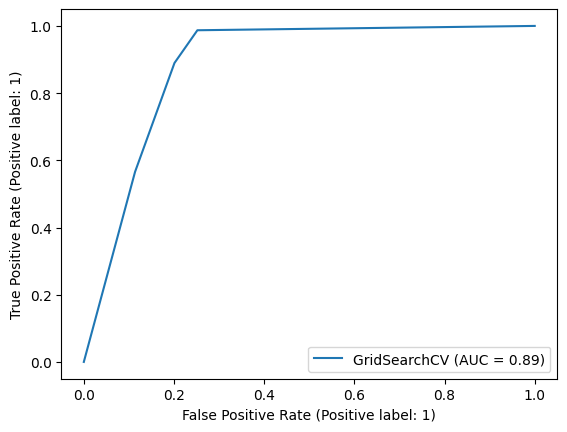

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

print("classification report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))
print("AUC score:\n", RocCurveDisplay.from_estimator(knn, X_test, y_test))

### NB

In [47]:
from sklearn.naive_bayes import GaussianNB

gnb = GridSearchCV(GaussianNB(), {'var_smoothing': [1e-8,  1e-9, 1e-10],}).fit(X_train, y_train)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(y_pred)

[0 0 1 ... 0 1 1]


classification report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1745
           1       0.80      0.87      0.83      1791

    accuracy                           0.82      3536
   macro avg       0.83      0.82      0.82      3536
weighted avg       0.83      0.82      0.82      3536

Accuracy: 0.8226809954751131

Confusion: 
 [[1353  392]
 [ 235 1556]]
AUC score:


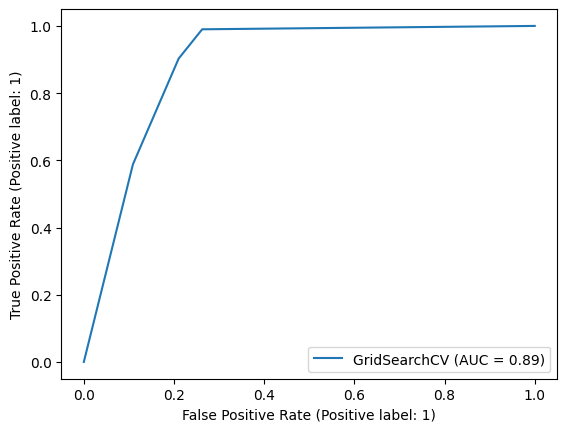

In [48]:
print("classification report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))
print("AUC score:\n", RocCurveDisplay.from_estimator(knn, X_test, y_test))

### Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

clf = GridSearchCV(LogisticRegression(), {'penalty': ['l2', 'none']}).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 1 ... 0 1 1]


C:\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\ML\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated 

classification report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1745
           1       0.80      0.92      0.86      1791

    accuracy                           0.85      3536
   macro avg       0.86      0.85      0.85      3536
weighted avg       0.86      0.85      0.85      3536

Accuracy: 0.8481334841628959

Confusion: 
 [[1344  401]
 [ 136 1655]]
AUC score:


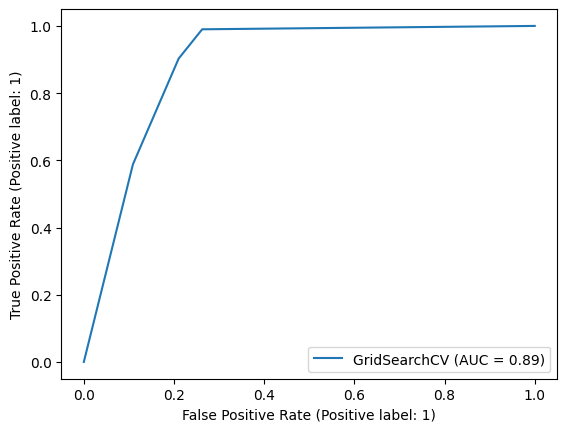

In [66]:
print("classification report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))
print("AUC score:\n", RocCurveDisplay.from_estimator(knn, X_test, y_test))

### SVM

In [14]:
from sklearn import svm

clf = GridSearchCV(svm.SVC(), {'kernel': ['linear', 'poly', 'rbf']}).fit(X_train, y_train)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 1]


classification report:
               precision    recall  f1-score   support

           0       0.99      0.74      0.85      1751
           1       0.80      0.99      0.88      1785

    accuracy                           0.87      3536
   macro avg       0.89      0.87      0.87      3536
weighted avg       0.89      0.87      0.87      3536

Accuracy: 0.8682126696832579

Confusion: 
 [[1304  447]
 [  19 1766]]
AUC score:


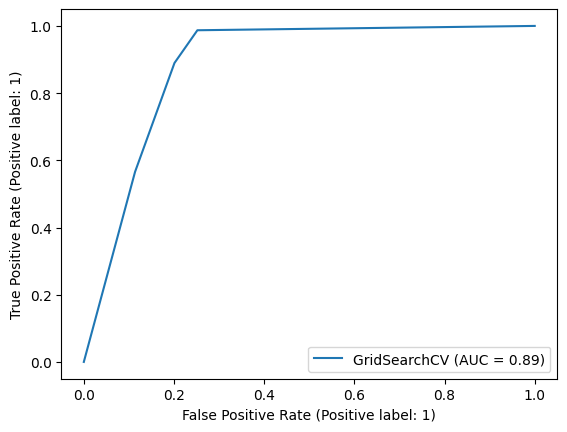

In [17]:
print("classification report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion: \n", confusion_matrix(y_test, y_pred))
print("AUC score:\n", RocCurveDisplay.from_estimator(knn, X_test, y_test))

In [20]:
!pip install h5py


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
filename = '../models/SVM_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [27]:
loaded_model = pickle.load(open('../models/SVM_model.sav', 'rb'))

In [28]:
loaded_model.predict(X_test)
print(y_pred)

[0 1 0 ... 0 0 1]


### Самостоятельно реализуйте метрики Accuracy, Precision, Recall, F1

In [30]:
def accuracy(y_test, y_pred):
    correct = 0
    for i in range (y_test.shape[0]):
        if y_test[i] == y_pred[i]:
            correct += 1
    return (correct / len(y_test))


def precision(y_test, y_pred):
    TP = 0
    positive = 0
    for i in range (y_test.shape[0]):
        if y_pred[i] == 1:
            positive += 1
            if y_test[i] == 1:
                TP += 1
    return TP/(positive)


def recall(y_test, y_pred):
    TP = 0
    positive = 0
    for i in range (y_test.shape[0]):
        if y_test[i] == 1:
            positive += 1
            if y_pred[i] == 1:
                TP += 1
    return TP/(positive)


def F1(y_test, y_pred):
    prec = precision(y_test, y_pred)
    rec = recall(y_test, y_pred)
    return (2*prec*rec)/(prec + rec)

### Самостоятельно реализуйте kNN и Naive Bayes

In [82]:
class KNN:

    def __init__(self, n):
        self.n = n

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for i in range(X_test.shape[0]):
            dist = np.linalg.norm(self.X_train - X_test[i], axis=1)
            neighbours_class, neighbours_idx = self.find_neighbours(dist)
            best = self.best_class(neighbours_class)
            y_pred[i] = best
        return y_pred

    def find_neighbours(self, dist):
        neighbours_idx = dist.argsort()[:self.n]
        neighbours_class = self.y_train[neighbours_idx]
        return neighbours_class, neighbours_idx

    def best_class(self, neighbours_class):
        classes, counts = np.unique(neighbours_class, return_counts=True)
        max_value = max(counts)
        max_idx = counts.index(max_value)
        best = classes[max_idx]

        return best

In [81]:
from scipy.stats import norm

class NB:
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes = y.unique()
        self.n_classes = y.nunique()

        self.mean_predictors = np.zeros((self.n_classes, X.shape[1]))
        self.scale = np.zeros((self.n_classes, X.shape[1]))
        self.P_class = np.zeros(self.n_classes)

        for i, class_ in enumerate(self.classes):
            X_class = X[y == class_]
            self.mean_predictors[i, :] = X_class.mean(axis=0)
            self.scale[i, :] = np.sqrt(X_class.var(axis=0))
            self.P_class[i] = X_class.shape[0]/float(X.shape[0])
        

    def predict(self, X_test):
        y_pred = []
        for x in X_test:
            p = {}
            for i in range(self.n_classes):
                p[i] = self.P_class[i]
                for k, predictor in enumerate(x):
                    p[i] *= norm.pdf(predictor, self.mean_predictors[i][k],self.scale[i][k])
            y_pred.append(self.classes[pd.Series(p).values.argmax()]) 
        return y_pred  

In [84]:
bn = NB()
bn.fit(X_train, y_train)
y_pred = bn.predict(X_test)
y_pred

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [85]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8232466063348416
